# open_cv操作

## 图片加载、显示和保存

In [4]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt #导入plt显示图片，方便在notebook里查看

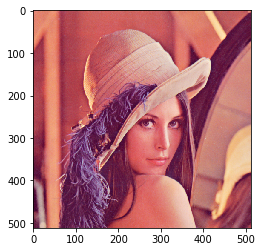

In [15]:
# 读取原始图片
img = cv2.imread("lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #调换通道使原图颜色显示正常
plt.imshow(img)

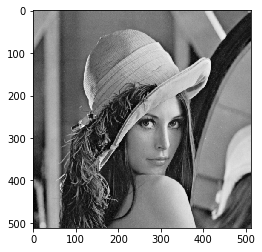

In [25]:
# 转换成灰度图片
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgGrey, cmap='gray') #显示灰度图

In [26]:
# 保存灰度图片
cv2.imwrite("lena_Gray.tif",imgGrey)

True

## 图片宽、高、通道数获取

In [33]:
img = cv2.imread("lena_std.tif")
img.shape #rgb图片的尺寸大小和通道数

(512, 512, 3)

In [35]:
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgGrey.shape #灰度图返回图片尺寸

(512, 512)

## 图像像素数目和图像数据类型的获取

In [102]:
img = cv2.imread("lena_std.tif")
img.size #512*512*3

786432

In [104]:
img.dtype

dtype('uint8')

## 生成指点大小的空图像

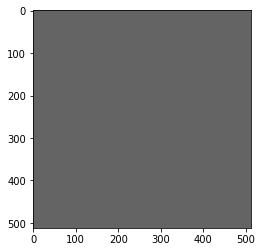

In [105]:
import numpy as np
imgZero = np.zeros(img.shape,np.uint8)+100 #每个像素加100的灰度级，只有一个通道
plt.imshow(imgZero) #现实单通道，即灰度图

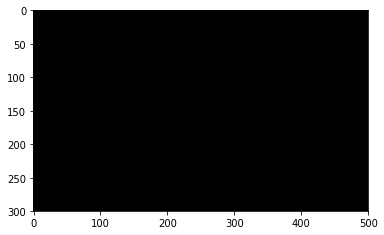

In [106]:
imgFix = np.zeros((300,500,3),np.uint8)
plt.imshow(imgFix)

## 访问和操作图像像素
### OpenCV中图像矩阵的顺序是B、G、R。可以直接通过坐标位置访问和操作图像像素。

In [109]:
img = cv2.imread("lena_Gray.tif")
#访问制定坐标的像素点
pixel = img[50,100]
pixel

array([104, 104, 104], dtype=uint8)

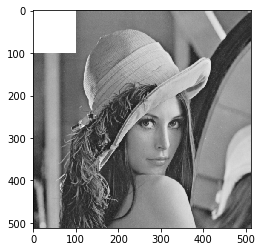

In [110]:
#修改指定坐标的像素(把左上角的100*100像素置为纯白)
for i in range(100):
    for j in range(100):
        img[i,j] = (255,255,255)
plt.imshow(img)

### 分开访问图像某一通道像素

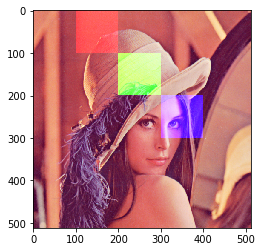

In [112]:
img = cv2.imread("lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #调换通道使原图颜色显示正常

img[0:100,100:200,0] = 255 #将0-100,100-200的区域红通道置为255
img[100:200,200:300,1] = 255 #将100-200,200-300的区域绿通道置为255
img[200:300,300:400,2] = 255 #将200-300,300-400的区域蓝通道置为255
plt.imshow(img)

### 图像三通道分离和合并

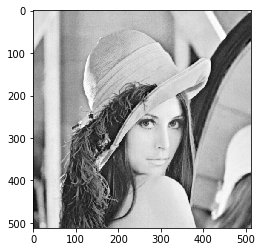

In [153]:
img = cv2.imread("lena_std.tif")
b , g , r = cv2.split(img) #三通道分离
plt.imshow(r, cmap='gray') #显示红通道,选择灰度模式

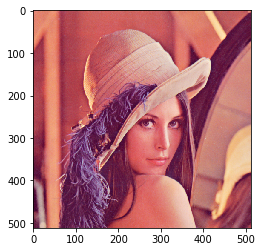

In [128]:
merged = cv2.merge([r,g,b]) #合并通道
plt.imshow(merged)

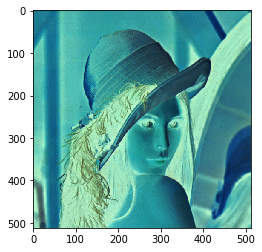

In [129]:
# 进行负片化处理，求每个通道颜色的补色
r = 255 - r
g = 255 - g
b = 255 - b
merged = cv2.merge([r,g,b]) #合并补色后的通道
plt.imshow(merged)

### 图片旋转与缩放与尺度变换

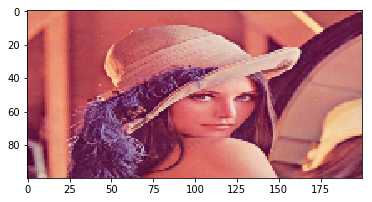

In [139]:
img = cv2.imread("lena_std.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #调换通道使原图颜色显示正常

img_new = cv2.resize(img,(200,100)) #图片压缩
plt.imshow(img_new)

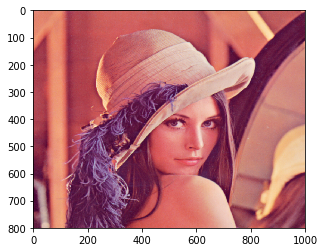

In [140]:
img_new = cv2.resize(img,(1000,800)) #图片放大
plt.imshow(img_new)

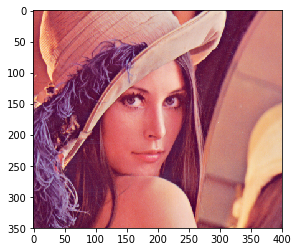

In [141]:
new_image = img[121: 471, 108:508] #从图像中切分部分区域，进行尺度变换
plt.imshow(new_image)

### 图片亮度与对比度转换

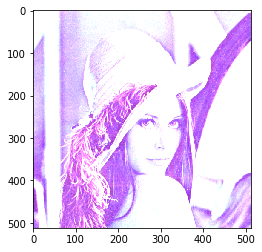

In [135]:
blank = np.zeros(img.shape, img.dtype)  # dtype is uint8
img_new = cv2.addWeighted(img, 2.2, blank, 0, 50)
# img1：第一个输入图片。
# alpha：第一个图片的权重。
# img1：第二个输入图片，其大小和通道号与src1相同。
# beta: 第二个图片的权重。
# gamma:标量加到每个和上。
plt.imshow(img_new)